# Lesson 2: Audio arrays with NumPy

In this lesson you will start working with **audio as numbers**.
You will:

- Create and inspect simple NumPy arrays
- Generate a tiny synthetic tone with NumPy
- Change volume and concatenate short signals

We will *not* yet build any text-to-speech system here; the goal is
just to get comfortable treating audio as arrays of samples.


## 0. Setup

Run the next cell once at the start of the notebook.


In [1]:
import numpy as np

print("NumPy version:", np.__version__)


NumPy version: 2.0.2


In [4]:
a = [1, 2, 3]
b = [4, 5, 6]

In [6]:
a + b

[1, 2, 3, 4, 5, 6]

## 1. Simple arrays (warm-up)

In this section you will create very small arrays and apply basic
operations to them. These operations are the same kinds of operations
we will later use on audio sample arrays.

### Task

- Create a NumPy array called `samples` with the values `[0, 1, 2, 3, 4]`.
- Print its `dtype` and `shape`.
- Multiply it by 2 to get `doubled` and print that as well.
- Create another array `offset` with values `[10, 10, 10, 10, 10]` and
  add it to `samples` to get `shifted`.
- Compute the elementwise sum of `samples` and `doubled` and store it in
  `combined`.
- Compute the overall mean value of `samples` using `np.mean`.


In [31]:
import numpy as np  # just to be sure

samples = np.array([0, 1, 2, 3, 4])


# TODO: create a NumPy array called `samples` with values [0, 1, 2, 3, 4].
# TODO: print its dtype and shape.
# TODO: create a new array `doubled` that is `samples * 2` and print it.
# TODO: create another array `offset` with all values equal to 10 and
#       add it to `samples` to get `shifted`.
# TODO: create `combined` as the elementwise sum of `samples` and `doubled`.
# TODO: compute the mean of `samples` using np.mean.


In [13]:
a = [0, 1, "a", 3, 4, lambda x : x **2]
a

[0, 1, 'a', 3, 4, <function __main__.<lambda>(x)>]

In [ ]:
np.int16
# -2^15, 2^15 - 1

numpy.int16

In [ ]:
np.int64
# -2^63, 2^63 - 1

numpy.int64

In [33]:
samples 

array([0, 1, 2, 3, 4])

In [36]:
wave1 = samples
wave2 = samples * 2
wave3 = samples + 100

In [37]:
wave1 + wave2 + wave3

array([100, 104, 108, 112, 116])

## 2. Generating a simple tone with NumPy

Digital audio is a sequence of samples. For a pure tone (sine wave) we
can generate the samples ourselves.

We will use:

- Sample rate `sr = 16000` (samples per second)
- Duration `duration = 0.5` seconds
- Frequency `freq = 440.0` Hz (concert A)

Inside NumPy we will first create the tone as **floating point** samples
in the range [-1.0, 1.0]. Most audio interfaces (including WAV files and
PyAudio streams) expect **16-bit integers** instead: whole numbers in the
range [-32768, 32767]. This is called 16-bit PCM audio and gives 65536
different loudness levels for each sample.

To convert from float to 16-bit PCM we scale the waveform by 32767 and
cast it to `np.int16`.

### Task

- Create a time axis `t` using `np.linspace` or `np.arange`.
- Compute a sine wave `x` with amplitude between -1 and 1.
- Convert it to 16-bit integers called `waveform` so that it is
  suitable for saving to audio files or playback later.


In [ ]:
#.wav
#

32768

In [69]:
import numpy as np
import matplotlib.pyplot as plt

sr = 16000        # samples per second
duration = 0.5   # seconds
freq = 440.0     # Hz

# TODO: create a time axis `t` from 0 to `duration` (not including the end)
#       with `int(sr * duration)` points.
# TODO: create a sine wave `x` = sin(2 * pi * freq * t).
# TODO: create an int16 array `waveform` by scaling `x` to the range
#       [-32767, 32767].

# Hint: np.sin and np.pi are useful here.

sample_count = int(sr * duration)
sample_time = np.linspace(0, duration, sample_count)

x = np.sin(2 * np.pi * freq * sample_time)
scale = 2 ** 15

scaled_x = x * scale
waveform = scaled_x.astype(np.int16)

In [73]:
x.dtype

dtype('float64')

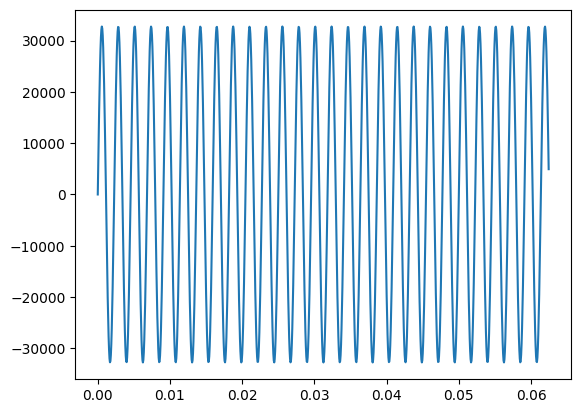

In [71]:
plt.plot(sample_time[:1000], waveform[:1000])

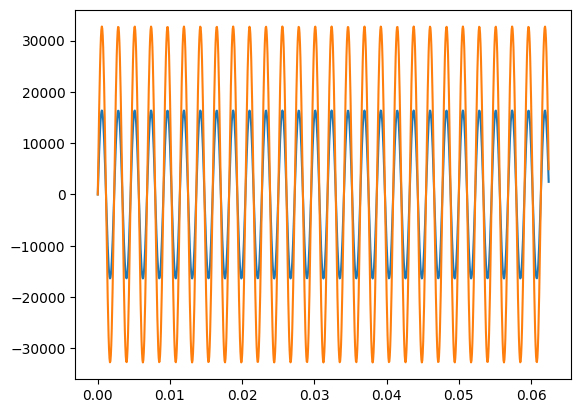

In [77]:
plt.plot(sample_time[:1000], (waveform*0.5)[:1000])
plt.plot(sample_time[:1000], waveform[:1000])

## 2.1 Plotting the waveform

It is often helpful to **see** the waveform as a function of time.
For a short segment we can use `matplotlib` to plot amplitude against
sample index or against time in seconds.

### Task

- Import `matplotlib.pyplot` as `plt`.
- Plot a small part of the waveform (for example the first 1000 samples)
  either against sample index or against time `t`.
- Label the axes so you can see what is being plotted (for example,
  time on the x-axis and amplitude on the y-axis).


In [ ]:
import matplotlib.pyplot as plt

# TODO: choose how many samples to plot, e.g. num_to_plot = min(1000, len(t)).
# TODO: create a new figure and plot t[:num_to_plot] against x[:num_to_plot]
#       (or plot waveform[:num_to_plot] against sample index).
# TODO: add axis labels and a title, then call plt.show().


## 3. Concatenating and scaling signals

Once you have a waveform array, you can manipulate it like any other
NumPy array.

### Task

- Starting from `waveform`:
  - Create `quiet` which is the same waveform but at half volume.
  - Create `loud` which is the same waveform but 1.5 times louder
    (be careful not to overflow the 16-bit range).
  - Create `twice` which plays the tone twice in a row using
    `np.concatenate`.
- Print the length of each array and inspect the first few samples.


In [78]:
x = np.int16(2**15-1)
x

np.int16(32767)

np.float64(65534.0)

In [90]:
import numpy as np


quiet = waveform * 0.5
loud = np.clip(waveform * 1.5, a_min=-scale, a_max=scale)
twice = np.concatenate((waveform, waveform))

# TODO: create `quiet`, `loud`, and `twice` based on `waveform`.
# Hint: you can multiply integer arrays, but it may be easier to
#       convert to float, scale, then convert back to int16.


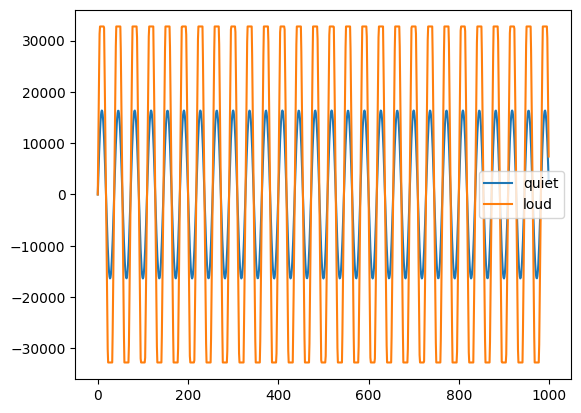

In [91]:
plt.plot(quiet[:1000], label="quiet")
plt.plot(loud[:1000], label="loud")
plt.legend()

## 3.1 Visualising scaling and concatenation

Plots help you see how volume changes and concatenation affect the
waveform.

### Task

- Plot a short segment of the original `waveform` and the quieter
  version `quiet` on the same axes.
- Plot a short segment of the louder version `loud` as well.
- (Optional) plot the concatenated signal `twice` in a separate figure
  to see how its length has doubled.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# TODO: choose a short segment length, e.g. num_to_plot = min(1000, len(waveform)).
# TODO: create a figure and plot waveform[:num_to_plot], quiet[:num_to_plot]
#       and loud[:num_to_plot] on the same axes.
# TODO: add a legend and labels, then show the figure.
# TODO (optional): create another figure and plot a segment of `twice`.


## 4. (Optional) Saving a tone to a WAV file

This optional section shows how to save the generated tone to a WAV
file using the built-in `wave` module. This is **not** yet the final
way we will handle audio in the project, but it is useful practice.

### Task (optional)

- Use the `wave` module to write `waveform` (or `twice`) to a file
  called `example_tone.wav` in this folder.
- Check the file appears in the file browser and, if your system
  allows it, listen to it with an external player.


In [92]:
import wave
import numpy as np

filename = "example_tone.wav"
with wave.open(filename, "wb") as f:
    f.setnchannels(1)
    f.setsampwidth(2)  # 16-bit audio
    f.setframerate(sr)
    f.writeframes(waveform.tobytes())

print("Wrote", filename)


Wrote example_tone.wav


## 5. Reading a WAV file back into NumPy (optional)

In the previous section you (optionally) wrote a file `example_tone.wav`.
Here we will read that file back into a NumPy array and check that it
matches the original samples.

### Task

- Use the `wave` module to open `example_tone.wav` in **read-binary** mode.
- Read the header values: number of channels, sample width, frame rate,
  and number of frames.
- Read all frames into a bytes object and convert it to a NumPy array of
  type `int16` called `loaded`.
- Print the first 10 samples of `loaded` and compare them with the first
  10 samples of `waveform`.


In [93]:
import wave
import numpy as np

filename = "example_tone.wav"
with wave.open(filename, "rb") as f:
    n_channels = f.getnchannels()
    sampwidth = f.getsampwidth()
    framerate = f.getframerate()
    n_frames = f.getnframes()
    data = f.readframes(n_frames)

print("channels:", n_channels, "width:", sampwidth,
      "rate:", framerate, "frames:", n_frames)

loaded = np.frombuffer(data, dtype=np.int16)

print("loaded first 10:", loaded[:10])
print("original first 10:", waveform[:10])


channels: 1 width: 2 rate: 16000 frames: 8000
loaded first 10: [    0  5634 11101 16237 20889 24919 28206 30654 32188 32764]
original first 10: [    0  5634 11101 16237 20889 24919 28206 30654 32188 32764]


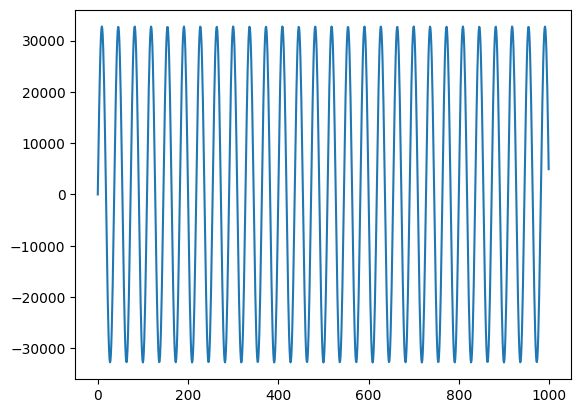

In [94]:
plt.plot(loaded[:1000])

## 6. Creating fade-in and fade-out (optional)

A **fade-in** gradually increases volume from silence to full level.
A **fade-out** does the opposite.

### Task

- Starting from `waveform`:
  - Create a fade-in envelope `fade_in` going from 0.0 to 1.0.
  - Create a fade-out envelope `fade_out` going from 1.0 to 0.0.
  - Multiply `waveform` by these envelopes (after converting to float)
    to create `wave_in` and `wave_out`.
- Convert the results back to `int16`.
- Inspect the first and last few samples of `wave_in` and `wave_out`.


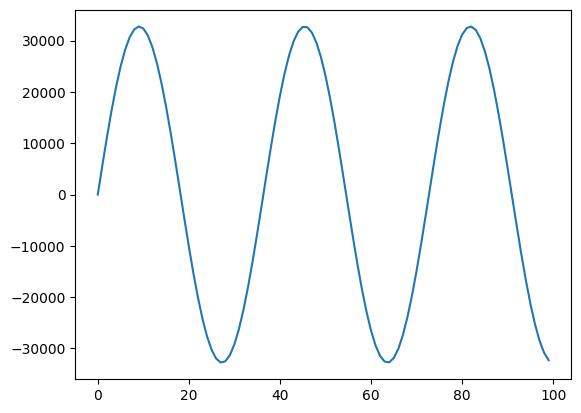

In [100]:
plt.plot(waveform[:100])

In [ ]:
waveform[10] * 0.1
waveform[20] * 0.2
waveform[30] * 0.3
waveform[40] * 0.4

np.float64(3236.3)

In [ ]:
# hint: use scale

# scale = np.linspace(0, 1, 100)

fadein = waveform.copy()
fadein[:100]

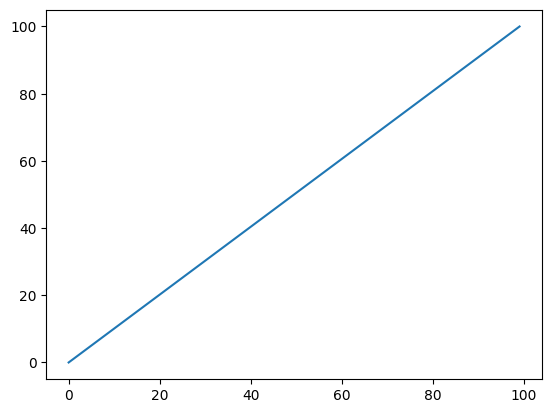

In [ ]:
y = np.linspace(0, 100, 100)


In [97]:
a = np.array([1, 2, 3])
b = np.array([2, 4, 6])

a * b

array([ 2,  8, 18])

In [ ]:
import numpy as np




# TODO (optional): build fade_in and fade_out arrays using np.linspace
#       of length len(waveform).
# TODO: create wave_in = waveform * fade_in and wave_out = waveform * fade_out
#       (use float for the multiplication, then convert back to int16).


## 6.1 Visualising fade-in and fade-out

The fade-in should start near zero and grow; the fade-out should start
strong and decay to zero.

### Task

- Plot the first part of `wave_in` and `wave_out` to see the beginning
  of the fade-in and fade-out.
- Plot the last part of `wave_in` and `wave_out` to see how they end.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# TODO: choose a small number of samples for the beginning and end,
#       for example N = 1000 or less if the signal is shorter.
# TODO: plot wave_in[:N] and wave_out[:N] on one figure ("start").
# TODO: plot wave_in[-N:] and wave_out[-N:] on another figure ("end").


## 7. Mixing two tones (optional)

To mix two sounds, you can **add their sample values** together.
Here we will create two tones with different frequencies and mix them
into a simple chord.

### Task

- Create a second tone called `waveform_high` with a higher frequency
  (for example 660 Hz) but the same duration and sample rate.
- Mix the two tones by adding their sample values to create `mix`.
- Use `np.clip` to keep the mixed signal in the range [-32767, 32767]
  before converting back to int16.
- Print the first few samples of `mix`.

> Later, a diphone-based TTS system will mix (concatenate and sometimes
> overlap) many short audio units in a similar way.


In [ ]:
import numpy as np

# TODO (optional): create a second tone `waveform_high` by reusing your
#       sine-wave code with a different frequency (e.g. 660 Hz).
# TODO: create a mixed signal by adding waveform and waveform_high.
#       Use np.clip to avoid overflow and convert the result to int16.


## 7.1 Visualising the mix

When two tones are mixed, the combined waveform is the sum of the
individual waveforms.

### Task

- Plot a short segment of `waveform` and `waveform_high` on the same
  axes.
- Plot the same segment of the mixed signal `mix` and compare its
  shape with the individual components.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# TODO: choose a short segment length, e.g. num_to_plot = min(1000, len(waveform)).
# TODO: create a figure and plot waveform[:num_to_plot] and
#       waveform_high[:num_to_plot].
# TODO: create another figure and plot mix[:num_to_plot].


## 8. Inspecting levels and normalising (optional)

Sometimes audio signals are too quiet or too loud. It is useful to
inspect basic statistics (minimum, maximum, average, RMS) and to create
a **normalised** version whose loudest sample just reaches the 16-bit
limit.

### Task

- Compute and print the minimum, maximum and mean of `waveform`.
- Convert `waveform` to float in the range [-1, 1] called `x_float`.
- Compute the RMS (root mean square) of `x_float`.
- Create a normalised version `wave_norm` where the maximum absolute
  value is 32767 when converted back to int16 (hint: divide by the
  current max abs, then multiply by 32767).


In [ ]:
import numpy as np

# TODO (optional): inspect min, max, mean of `waveform`.
# TODO: build x_float = waveform.astype(np.float32) / 32767.0.
# TODO: compute the RMS value of x_float.
# TODO: create a normalised int16 array wave_norm.


## 9. Mono and simple stereo (optional)

Most of our work will use **mono** signals (one channel), but real audio
often has two channels (stereo). A simple stereo signal can be stored as
a 2D array of shape `(num_samples, 2)`.

### Task

- Reuse your tone-generation code to create two mono tones:
  `left` at 440 Hz and `right` at 660 Hz, both as int16 arrays.
- Stack them into a stereo array `stereo` with shape `(N, 2)` using
  `np.stack` or `np.column_stack`.
- Print `stereo.shape` and inspect the first few rows.


In [ ]:
import numpy as np

# TODO (optional): create two mono tones `left` and `right` with
#       different frequencies, then stack them into a 2D array
#       `stereo` of shape (num_samples, 2).


## 10. (Optional) Quick playback with PyAudio

If PyAudio is available on your system, you can play a waveform directly
from this notebook. In the next lesson we will work with PyAudio in more
detail; here it is just a quick preview.

### Task (optional)

- Import `pyaudio` and create a `PyAudio` instance.
- Open an output stream with format `pyaudio.paInt16`, `channels=1`,
  and `rate=sr`.
- Write `waveform.tobytes()` (or `mix.tobytes()` from section 7) to the
  stream.
- Stop and close the stream, then terminate the PyAudio instance.

> If this does not work on your machine, you can skip it and just
> discuss the code instead.


In [96]:
# OPTIONAL: quick playback using PyAudio (may not work in all environments)
import numpy as np
import pyaudio

pa = pyaudio.PyAudio()
stream = pa.open(
    format=pyaudio.paInt16,
    channels=1,
    rate=sr,
    output=True,
)

# Play the generated waveform once
stream.write(waveform.tobytes())

stream.stop_stream()
stream.close()
pa.terminate()


ALSA lib pcm_dsnoop.c:567:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1000:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_oss.c:404:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:404:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_a52.c:1036:(_snd_pcm_a52_open) a52 is only for playback
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:481:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:481:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib pcm_dmix.c:1000:(snd_pcm_dmix_open) unable to open slave
